In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = {'Masa': [50, 80, 90, 45, 60],
        'Altura': [1.48, 1.82, 1.85, 1.55, 1.60],
        'Genero': ['m', 'h', 'h', 'm', 'm']}

In [3]:
df = pd.DataFrame(data)
df.head()

,Masa,Altura,Genero
0,50,1.48,m
1,80,1.82,h
2,90,1.85,h
3,45,1.55,m
4,60,1.60,m


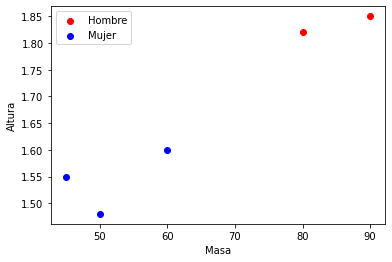

In [5]:
ax = plt.axes()

ax.scatter(df.loc[df['Genero'] == 'h', 'Masa'],
           df.loc[df['Genero'] == 'h', 'Altura'],
           c="red",
           label="Hombre")
ax.scatter(df.loc[df['Genero'] == 'm', 'Masa'],
           df.loc[df['Genero'] == 'm', 'Altura'],
           c="blue",
           label="Mujer")

plt.xlabel("Masa")
plt.ylabel("Altura")
ax.legend()
plt.show()

In [7]:
punto_nuevo = {'Masa': [70],
               'Altura': [1.82]}
punto_nuevo = pd.DataFrame(punto_nuevo)
punto_nuevo.head()

,Masa,Altura
0,70,1.82


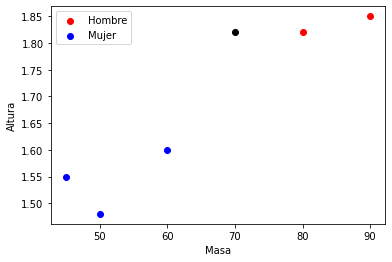

In [9]:
ax = plt.axes()

ax.scatter(df.loc[df['Genero'] == 'h', 'Masa'],
           df.loc[df['Genero'] == 'h', 'Altura'],
           c="red",
           label="Hombre")
ax.scatter(df.loc[df['Genero'] == 'm', 'Masa'],
           df.loc[df['Genero'] == 'm', 'Altura'],
           c="blue",
           label="Mujer")
ax.scatter(punto_nuevo['Masa'],
           punto_nuevo['Altura'],
           c="black")
plt.xlabel("Masa")
plt.ylabel("Altura")
ax.legend()
plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)

In [14]:
X = df[['Masa', 'Altura']]
y = df[['Genero']]
y.head()

,Genero
0,m
1,h
2,h
3,m
4,m


In [15]:
y.values.ravel()

array(['m', 'h', 'h', 'm', 'm'], dtype=object)

In [16]:
knn.fit(X,y.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [18]:
prediction = knn.predict(punto_nuevo)
prediction

array(['h'], dtype=object)

In [22]:
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

In [34]:
n_neighbors = 10

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

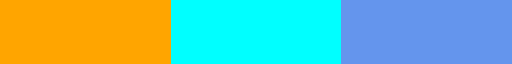

In [28]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]
cmap_light

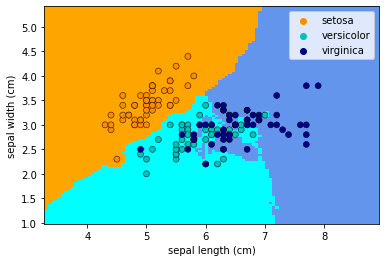

In [37]:
# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights="distance")
clf.fit(X, y)

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
    shading="auto",
)


# Plot also the training points
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=iris.target_names[y],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)



plt.show()